## Complexes Binding Affinity Prediction using Random Forest Regressor

##### Beryl Ramadhian Aribowo 
##### DDP - Master, Kanazawa University

https://github.com/berylgithub

## 1. Introduction
Molecular (Complex) docking is the process of docking or binding between two molecules, in this case the docking happens between Protein and Ligand molecules. The docking process is complete when the binding result is stable. The context of docking or binding stability can be obtained by various techniques, such as the Scoring functions. The scoring function is quantified by the Binding Affinity values of each complexes. The Binding Affinity is calculated/predicted by using Machine Learning Algorithm-Random Forest Regressor.

## 2. Dataset



- The data used here is PDBind protein-ligand refined data 2018 version http://www.pdbbind.org.cn/download.asp. 
- The dataset generator script can be found at https://github.com/berylgithub/thesis_KU/blob/master/dataset_creator.ipynb

## 3. Results

### 3.1. Feature Extraction

The data is pre-processed to acquire the $D=\{(y^{(n)}, \vec{x}^{(n)})\}^N_{n=1}$ array. By calculating the Heaviside step function that counts the contacts of atoms ($d_{cutoff}$) within 12 Angstrom. The formula to count the number of occurence between $j$ and $i$ atom is as follows:
<br>
$x_{Z(P(j)),Z(L(i))}\equiv\sum^{K_j}_{k=1}\sum^{L_i}_{l=1} \odot (d_{cutoff} - d_{kl})$
<br>

Here $P(j)$ corresponds to protein atoms, and $L(i)$ corresponds to ligand atoms, where nine atom types are considered respectively as follows:
<br>
$\{P(j)\}_{j=1}^{9} = \{C,N,O,F,P,S,Cl,Br,I\} \quad \{L(i)\}_{i=1}^{9} = \{C,N,O,F,P,S,Cl,Br,I\}$

The script used for data preprocessing and feature extraction is available at https://github.com/berylgithub/thesis_KU/blob/master/dataset_creator.ipynb. This pre-processed data is saved in  'refined_dataset_2018.csv' file, which can be loaded into machine learning script.

### 3.2. Data Splitting

In [1]:
import numpy as np, pandas as pd

In [4]:
'''Dataset Preparation'''
'''
Fetch the inputs and labels
'''
df_dataset = pd.read_csv('refined_dataset_2018.csv', sep='\t')

#id column
id_complexes = np.array(df_dataset['id_complex'])

#label column y
labels = np.array(df_dataset['y'])

#feature columns x, since the array is string '[0., 1., ....]', we need to convert them to numpy array first
features = np.array([np.fromstring((df_dataset['x'][i])[1:-1], sep=' ') for i in range(df_dataset['x'].shape[0])])

In [5]:
'''Preparation of Training and Testing Sets'''
'''
Splits the training and test data
'''
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=13)
print('Training Features Shape:', x_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', x_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (3297, 36)
Training Labels Shape: (3297,)
Testing Features Shape: (1099, 36)
Testing Labels Shape: (1099,)


In [6]:
'''Model Trainer'''
'''
Setup the Random Forest parameters
'''
from sklearn.ensemble import RandomForestRegressor

#generate the RF model
rf = RandomForestRegressor(n_estimators= 1000, random_state=13, verbose=1)

#train the model on training data
rf.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   25.0s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=13, verbose=1,
                      warm_start=False)

### 3.2. Evaluation of Machine Learning Model on Training Data

In [25]:
'''Model evaluation on training set'''
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
from math import sqrt

#Mean Absolute Error
preds = rf.predict(x_train)
errors = abs(preds - y_train)
print('Mean Absolute Error:', round(np.mean(errors), 2))

#Mean Absolute Percentage Error & Accuracy
mape = 100 * (errors / y_train)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

#Root Mean Squared Error
rmse = sqrt(mean_squared_error(y_train, preds))
print('Root Mean Squared Error :', round(rmse, 2))

#Pearson Correlation Coefficient (PCC) score
pcc = pearsonr(y_train, preds)
print('Pearson Correlation Coefficient :', round(pcc[0],2))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Mean Absolute Error: 0.4
Accuracy: 92.56 %.
Root Mean Squared Error : 0.51
Pearson Correlation Coefficient : 0.98


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.4s finished


No handles with labels found to put in legend.


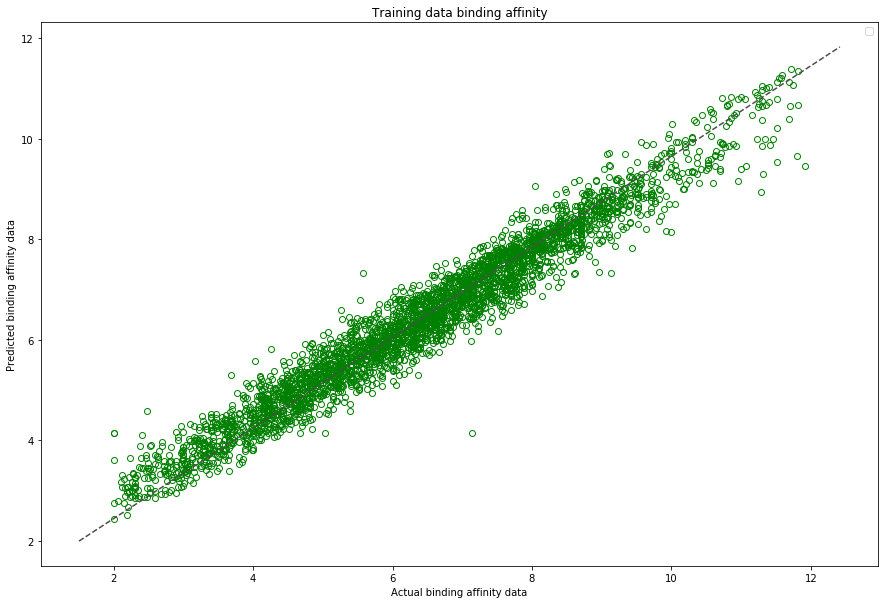

In [30]:
'''Visualization on training data'''
import matplotlib.pyplot as plt

fig_size = np.zeros(2)
fig_size[0] = 15
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

f, ax = plt.subplots()

plt.plot(y_train, preds, 'o', markerfacecolor="None", markeredgecolor='green', markeredgewidth=1)
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")

plt.title("Training data binding affinity")
plt.xlabel('Actual binding affinity data')
plt.ylabel('Predicted binding affinity data')
plt.legend()
plt.show()


### 3.3. Evaluation of Machine Learning Model on Test Data

In [31]:
'''Model evaluation on Test set'''
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
from math import sqrt

#Mean Absolute Error
preds = rf.predict(x_test)
errors = abs(preds - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2))

#Mean Absolute Percentage Error & Accuracy
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

#Root Mean Squared Error
rmse = sqrt(mean_squared_error(y_test, preds))
print('Root Mean Squared Error :', round(rmse, 2))

#Pearson Correlation Coefficient (PCC) score
pcc = pearsonr(y_test, preds)
print('Pearson Correlation Coefficient :', round(pcc[0],2))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


Mean Absolute Error: 1.07
Accuracy: 80.6 %.
Root Mean Squared Error : 1.39
Pearson Correlation Coefficient : 0.72


No handles with labels found to put in legend.


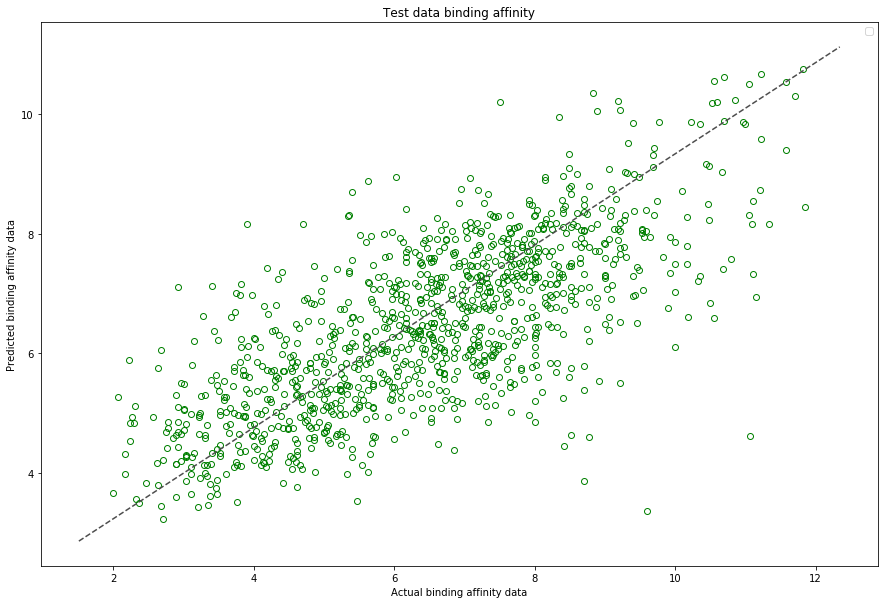

In [33]:
'''Visualization on test data'''
import matplotlib.pyplot as plt

fig_size = np.zeros(2)
fig_size[0] = 15
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

f, ax = plt.subplots()

plt.plot(y_test, preds, 'o', markerfacecolor="None", markeredgecolor='green', markeredgewidth=1)
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")

plt.title("Test data binding affinity")
plt.xlabel('Actual binding affinity data')
plt.ylabel('Predicted binding affinity data')
plt.legend()
plt.show()
